In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from astropy.io import ascii

%load_ext autoreload
%autoreload 2

from matplotlib import rc

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
# Constants and definitions:
smc_distance = 60.6e3
lmc_distance = 50e3

def Absolute_to_Apparent(AbsoluteMag,distance):
    return AbsoluteMag + 5 * (np.log10(distance/10))

## Read in and Prepare the Data:

In [ ]:
base = '/Users/mdrout/Research/MassiveStars/HeStars/Magellan-Targets2019/'
lmc = pd.read_csv(base+'LMC_combined_1_1.csv')
smc = pd.read_csv(base+'SMC_combined_1_1.csv')

In [146]:
###########
## Reduce #
###########

print(f'Total LMC Sources: {lmc.shape[0]}')
print(f'Total SMC Sources: {smc.shape[0]}')

# Drop Nans
lmc = lmc.dropna(subset=['uvw2_mag', 'uvw2_mag_err', 'uvm2_mag','uvm2_mag_err', 'uvw1_mag', 'uvw1_mag_err', 'Umag', 'e_Umag', 'Bmag','e_Bmag', 'Vmag', 'e_Vmag'])
smc = smc.dropna(subset=['uvw2_mag', 'uvw2_mag_err', 'uvm2_mag','uvm2_mag_err', 'uvw1_mag', 'uvw1_mag_err', 'Umag', 'e_Umag', 'Bmag','e_Bmag', 'Vmag', 'e_Vmag'])

print(f'After Dropping Nans LMC Sources: {lmc.shape[0]}')
print(f'After Dropping Nans SMC Sources: {smc.shape[0]}')

# Saturated Flag 
lmc = lmc[(lmc.uvm2_saturated == 0) & (lmc.uvw1_saturated == 0) & (lmc.uvw2_saturated == 0)]
smc = smc[(smc.uvm2_saturated == 0) & (smc.uvw1_saturated == 0) & (smc.uvw2_saturated == 0)]

print(f'Keeping Saturated Flag = 0 LMC Sources: {lmc.shape[0]}')
print(f'Keeping Saturated Flag = 0 SMC Sources: {smc.shape[0]}')

# SSS Flag 
lmc = lmc[(lmc.uvm2_sss == 1.0) & (lmc.uvw1_sss == 1.0) & (lmc.uvw2_sss == 1.0)]
smc = smc[(smc.uvm2_sss == 1.0) & (smc.uvw1_sss == 1.0) & (smc.uvw2_sss == 1.0)]


print(f'Keeping SSS Flag = 1 LMC Sources: {lmc.shape[0]}')
print(f'Keeping SSS Flag = 1 SMC Sources: {smc.shape[0]}')

# Edge Flag 
lmc = lmc[(lmc.uvm2_edge == 1.0) & (lmc.uvw1_edge == 1.0) & (lmc.uvw2_edge == 1.0)]
smc = smc[(smc.uvm2_edge == 1.0) & (smc.uvw1_edge == 1.0) & (smc.uvw2_edge == 1.0)]

print(f'Keeping Edge Flag = 1 LMC Sources: {lmc.shape[0]}')
print(f'Keeping Edge Flag = 1 SMC Sources: {smc.shape[0]}')

# Residual Frac Error
max_resid_error = 0.5
lmc = lmc[(np.abs(lmc.uvm2_resid_frac) < max_resid_error) & (np.abs(lmc.uvw1_resid_frac) < max_resid_error) & (np.abs(lmc.uvw2_resid_frac) < max_resid_error)]
smc = smc[(np.abs(smc.uvm2_resid_frac) < max_resid_error) & (np.abs(smc.uvw1_resid_frac) < max_resid_error) & (np.abs(smc.uvw2_resid_frac) < max_resid_error)]

print(f'Keeping Max Residaul Under {max_resid_error} LMC Sources: {lmc.shape[0]}')
print(f'Keeping Max Residaul Under {max_resid_error} LMC Sources: {smc.shape[0]}')

# UVOT - Mag Error 
max_mag_error = 0.25
lmc = lmc[(lmc.uvm2_mag_err < max_mag_error) & (lmc.uvw1_mag_err < max_mag_error) & (lmc.uvw2_mag_err < max_mag_error)]
smc = smc[(smc.uvm2_mag_err < max_mag_error) & (smc.uvw1_mag_err < max_mag_error) & (smc.uvw2_mag_err < max_mag_error)]

print(f'Keeping Max UVOT Mag Error Under {max_mag_error} LMC Sources: {lmc.shape[0]}')
print(f'Keeping Max UVOT Mag Error Under {max_mag_error} LMC Sources: {smc.shape[0]}')

# Optical -  Mag Error
max_emag = 0.25 
lmc = lmc[(lmc.e_Umag < max_mag_error) & (lmc.e_Bmag < max_mag_error) & (lmc.e_Vmag < max_mag_error) & (lmc.e_Imag < max_mag_error)]
smc = smc[(smc.e_Umag < max_mag_error) & (smc.e_Bmag < max_mag_error) & (smc.e_Vmag < max_mag_error) & (smc.e_Imag < max_mag_error)]

print(f'Remaining LMC Sources: {lmc.shape[0]}')
print(f'Remaining SMC Sources: {smc.shape[0]}')

# Drop sources base on colors:
smc = smc.drop(smc[smc["uvw1_mag"] - smc["Umag"] < -3].index).reset_index(drop=True)
smc = smc.drop(smc[smc["uvw1_mag"] - smc["Umag"] > 3].index).reset_index(drop=True)
smc = smc.drop(smc[smc["Umag"] - smc["Bmag"] < -2].index).reset_index(drop=True)
smc = smc.drop(smc[smc["Umag"] - smc["Bmag"] > 2].index).reset_index(drop=True)
smc = smc.drop(smc[smc["Bmag"] - smc["Vmag"] < -1].index).reset_index(drop=True)
smc = smc.drop(smc[smc["Bmag"] - smc["Vmag"] > 1].index).reset_index(drop=True)
smc = smc.drop(smc[smc["Vmag"] - smc["Imag"] < -1].index).reset_index(drop=True)
smc = smc.drop(smc[smc["Vmag"] - smc["Imag"] > 1].index).reset_index(drop=True)

lmc = lmc.drop(lmc[lmc["uvw1_mag"] - lmc["Umag"] < -3].index).reset_index(drop=True)
lmc = lmc.drop(lmc[lmc["uvw1_mag"] - lmc["Umag"] > 3].index).reset_index(drop=True)
lmc = lmc.drop(lmc[lmc["Umag"] - lmc["Bmag"] < -2].index).reset_index(drop=True)
lmc = lmc.drop(lmc[lmc["Umag"] - lmc["Bmag"] > 2].index).reset_index(drop=True)
lmc = lmc.drop(lmc[lmc["Bmag"] - lmc["Vmag"] < -1].index).reset_index(drop=True)
lmc = lmc.drop(lmc[lmc["Bmag"] - lmc["Vmag"] > 1].index).reset_index(drop=True)
lmc = lmc.drop(lmc[lmc["Vmag"] - lmc["Imag"] < -1].index).reset_index(drop=True)
lmc = lmc.drop(lmc[lmc["Vmag"] - lmc["Imag"] > 1].index).reset_index(drop=True)
#abs(Vmag-Bmag) < 1. && abs(uvw1_mag-Umag) < 3.

print(f'Remaining LMC Sources: {lmc.shape[0]}')
print(f'Remaining SMC Sources: {smc.shape[0]}')


lmc.to_csv("LMC_Reduced.csv",index=False)
smc.to_csv("SMC_Reduced.csv",index=False)

Total LMC Sources: 171745
Total SMC Sources: 105945
After Dropping Nans LMC Sources: 171745
After Dropping Nans SMC Sources: 105945
Keeping Saturated Flag = 0 LMC Sources: 171745
Keeping Saturated Flag = 0 SMC Sources: 105945
Keeping SSS Flag = 1 LMC Sources: 171745
Keeping SSS Flag = 1 SMC Sources: 105945
Keeping Edge Flag = 1 LMC Sources: 171745
Keeping Edge Flag = 1 SMC Sources: 105945
Keeping Max Residaul Under 0.5 LMC Sources: 171745
Keeping Max Residaul Under 0.5 LMC Sources: 105945
Keeping Max UVOT Mag Error Under 0.25 LMC Sources: 171745
Keeping Max UVOT Mag Error Under 0.25 LMC Sources: 105945
Remaining LMC Sources: 171745
Remaining SMC Sources: 105945
Remaining LMC Sources: 161030
Remaining SMC Sources: 105945


In [1]:
###################
# Dust Correction #
###################

import Dust

lmc_corr = Dust.DustCorrection("LMC_Reduced.csv")
smc_corr = Dust.DustCorrection("SMC_Reduced.csv")

In [3]:
#####################
# M o d e l s  - OLD#
#####################

#mist_manager('../../Stellar_Tracks/SMC/SWIFT/cmd')
#mist_manager('../../Stellar_Tracks/LMC/SWIFT/cmd')

#zsmc = pd.read_csv('Mesa_ZAMS_SMC.csv')
#zlmc = pd.read_csv('Mesa_ZAMS_SMC.csv')


###############
# M o d e l s #
###############

#These are all in absolute magnitude. 

zams_smc = ascii.read("ZAMS_Z0.002_Vegamag.txt")
zams_lmc = ascii.read("ZAMS_Z0.006_Vegamag.txt")

she_smc = ascii.read("stripped_stars_Z0.002_Vegamag.txt")
she_lmc = ascii.read("stripped_stars_Z0.006_Vegamag.txt")

zams_smc_uvm2 = Absolute_to_Apparent(zams_smc["UVM2_spec"],smc_distance)
zams_smc_v = Absolute_to_Apparent(zams_smc["V_spec"],smc_distance)

zams_lmc_uvm2 = Absolute_to_Apparent(zams_lmc["UVM2_spec"],lmc_distance)
zams_lmc_v = Absolute_to_Apparent(zams_lmc["V_spec"],lmc_distance)


zams_smcAB = ascii.read("ZAMS_Z0.002_ABmag.txt")
zams_lmcAB = ascii.read("ZAMS_Z0.006_ABmag.txt")

she_smcAB = ascii.read("stripped_stars_Z0.002_ABmag.txt")
she_lmcAB = ascii.read("stripped_stars_Z0.006_ABmag.txt")


zams_smc_uvm2AB = Absolute_to_Apparent(zams_smcAB["UVM2_spec"],smc_distance)
zams_smc_vAB = Absolute_to_Apparent(zams_smcAB["V_spec"],smc_distance)

zams_lmc_uvm2AB = Absolute_to_Apparent(zams_lmcAB["UVM2_spec"],lmc_distance)
zams_lmc_vAB = Absolute_to_Apparent(zams_lmcAB["V_spec"],lmc_distance)

she_smc_uvm2AB = Absolute_to_Apparent(she_smcAB["UVM2"],smc_distance)
she_smc_vAB = Absolute_to_Apparent(she_smcAB["V"],smc_distance)

she_lmc_uvm2AB = Absolute_to_Apparent(she_lmcAB["UVM2"],lmc_distance)
she_lmc_vAB = Absolute_to_Apparent(she_lmcAB["V"],lmc_distance)


In [4]:
def get_colors(x,y,zams_uvm2,zams_v):
    '''x is the uvm2-v color of data; y is uvm2'''

    data_x = np.array(x)
    data_y = np.array(y)
    curve_x = np.array(zams_uvm2) - np.array(zams_v)
    curve_y = np.array(zams_uvm2)
    
    #Interpolate the ZAMS to the y (uvm2) value of the data
    zams_color_ref = np.interp(data_y,np.flip(curve_y,0),np.flip(curve_x,0))
   
    m_map = []; sizes = []; alphas = []
    for i in range(len(x)):
        if x[i] < zams_color_ref[i]:
            #c = "#0099b5"
            c = np.array([13,193,231])/255.
            s = 5
        if x[i] >= zams_color_ref[i]:
           # c = "#061728"
            c = np.array([9,7,52])/255. 
            s = 10
        m_map.append(c)
        sizes.append(s)
        
    return m_map,sizes

def get_blue(x,y,zams_uvm2,zams_v):
    '''x is the uvm2-v color of data; y is uvm2'''

    data_x = np.array(x)
    data_y = np.array(y)
    curve_x = np.array(zams_uvm2) - np.array(zams_v)
    curve_y = np.array(zams_uvm2)
    
    #Interpolate the ZAMS to the y (uvm2) value of the data
    zams_color_ref = np.interp(data_y,np.flip(curve_y,0),np.flip(curve_x,0))
   
    x_sub = []; y_sub = []
    for i in range(len(x)):
        if x[i] < zams_color_ref[i]:
            x_sub.append(x[i])
            y_sub.append(y[i])
            
    return x_sub,y_sub

def get_red(x,y,zams_uvm2,zams_v):
    '''x is the uvm2-v color of data; y is uvm2'''

    data_x = np.array(x)
    data_y = np.array(y)
    curve_x = np.array(zams_uvm2) - np.array(zams_v)
    curve_y = np.array(zams_uvm2)
    
    #Interpolate the ZAMS to the y (uvm2) value of the data
    zams_color_ref = np.interp(data_y,np.flip(curve_y,0),np.flip(curve_x,0))
   
    x_sub = []; y_sub = []
    for i in range(len(x)):
        if x[i] >= zams_color_ref[i]:
            x_sub.append(x[i])
            y_sub.append(y[i])
            
    return x_sub,y_sub

In [5]:
import matplotlib.colors as colors
from scipy import stats
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

## Actual CMD PLOTS:

In [6]:
#########
# S M C #
#########

# Read in Data:
s = pd.read_csv('SMC_Reduced_DeRed.csv')
smc_mean_extinction = 0.15 #0.35

# Define Axes
#s_uvm2 = s["dered_uvm2"]  + 1.69
#s_v = s["dered_v"] + 0.02
s_uvm2 = s["uvm2_mag"] + 1.69 - 3.07 *smc_mean_extinction
s_v = s["vmag"] + 0.02 - smc_mean_extinction
s_uvm2_v = s_uvm2 - s_v

# Get color map for SMC:
#smc_map_1, smc_size_1 = get_colors(s_uvm2_v,s_uvm2,zams_smc_uvm2,zams_smc_v)
#smc_map_1, smc_size_1 = get_colors(s_uvm2_v,s_uvm2,zams_smc_uvm2AB,zams_smc_vAB)

#Separate based on line:
x_cand,y_cand = get_blue(s_uvm2_v,s_uvm2,zams_smc_uvm2AB,zams_smc_vAB)
x_ms, y_ms = get_red(s_uvm2_v,s_uvm2,zams_smc_uvm2AB,zams_smc_vAB)

#Create Main sequence density (Top Cat styling):
xy_ms = np.vstack([x_ms,y_ms])
z_ms = stats.gaussian_kde(xy_ms)(xy_ms)
idx_ms = z_ms.argsort()
x_ms, y_ms, z_ms = np.array(x_ms)[idx_ms], np.array(y_ms)[idx_ms], np.array(z_ms)[idx_ms]

In [26]:
# Stellar Data:
siso_path = '/Users/mdrout/Research/MassiveStars/HeStars/Magellan-Targets2019/SMC_Isolated_2019b.csv'
#siso_path = 'SMC_Isolated_2019.csv'
siso = pd.read_csv(siso_path,comment=';')
siso_uvm2 = siso["uvm2_mag"] + 1.69 - 3.07 * siso['Av']
siso_v = siso["Vmag"] + 0.02 - siso['Av']
siso_uvm2_v = siso_uvm2 - siso_v

sB_path = '/Users/mdrout/Research/MassiveStars/HeStars/Magellan-Targets2019/SMC_Bstarb.csv'
#siso_path = 'SMC_Isolated_2019.csv'
sB = pd.read_csv(sB_path,comment=';')
sB_uvm2 = sB["uvm2_mag"] + 1.69 - 3.07 * sB['Av']
sB_v = sB["Vmag"] + 0.02 - sB['Av']
sB_uvm2_v = sB_uvm2 - sB_v


swn_path = '/Users/mdrout/Research/MassiveStars/HeStars/Magellan-Targets2019/SMC_WR_2019.csv'
#swn_path = 'SMC_WR_2019.csv'
swn = pd.read_csv(swn_path,comment=';')
swn_uvm2 = swn["uvm2_mag"] + 1.69 - 3.07 * 3.1 * swn['E(B-V)']
swn_v = swn["Vmag"] + 0.02 - 3.1 * swn['E(B-V)']
swn_uvm2_v = swn_uvm2 - swn_v

file = open("absolute_magnitudes_SMC_WR.txt",'r').read()

hdr = ['name','UVW2','UVM2','UVW1','U','B','V','I','Comments']
wr_new_path= pd.read_csv("absolute_magnitudes_SMC_WR.txt",sep="\s+", header=None,names=hdr,comment=';')

wr_new_uvm2 = Absolute_to_Apparent(wr_new_path["UVM2"],smc_distance)
wr_new_v = Absolute_to_Apparent(wr_new_path["V"],smc_distance)

In [25]:
#########
# L M C #
#########

# Read in Data:
l = pd.read_csv('LMC_Reduced_DeRed.csv')
lmc_mean_extinction = 0.25 # 0.44

# Define Axes

l_uvm2 = l["uvm2_mag"] + 1.69 - 3.07 *lmc_mean_extinction
l_v = l["vmag"] + 0.02 - lmc_mean_extinction
l_uvm2_v = l_uvm2 - l_v

#Separate based on line:
lx_cand,ly_cand = get_blue(l_uvm2_v,l_uvm2,zams_lmc_uvm2AB,zams_lmc_vAB)
lx_ms, ly_ms = get_red(l_uvm2_v,l_uvm2,zams_lmc_uvm2AB,zams_lmc_vAB)

#Create Main sequence density (Top Cat styling):
lxy_ms = np.vstack([lx_ms,ly_ms])
lz_ms = stats.gaussian_kde(lxy_ms)(lxy_ms)
lidx_ms = lz_ms.argsort()
lx_ms, ly_ms, lz_ms = np.array(lx_ms)[lidx_ms], np.array(ly_ms)[lidx_ms], np.array(lz_ms)[lidx_ms]


In [29]:
# Stellar Data:
iso_path = '/Users/mdrout/Research/MassiveStars/HeStars/Magellan-Targets2019/LMC_Isolated_2019b.csv'
#iso_path = 'LMC_Isolated_2019.csv'
iso = pd.read_csv(iso_path,comment=';')
iso_uvm2 = iso["uvm2_mag"] + 1.69 - 3.07 *iso["Av"]
iso_v = iso["Vmag"] + 0.02 - iso["Av"]
#iso_uvm2 = iso["uvm2_mag"] + 1.69 - 3.07 *lmc_mean_extinction
#iso_v = iso["Vmag"] + 0.02 - lmc_mean_extinction
iso_uvm2_v = iso_uvm2 - iso_v

B_path = '/Users/mdrout/Research/MassiveStars/HeStars/Magellan-Targets2019/LMC_Bstarb.csv'
B = pd.read_csv(B_path,comment=';')
B_uvm2 = B["uvm2_mag"] + 1.69 - 3.07 * B['Av']
B_v = B["Vmag"] + 0.02 - B['Av']
B_uvm2_v = B_uvm2 - B_v

HeB_path = '/Users/mdrout/Research/MassiveStars/HeStars/Magellan-Targets2019/LMC_HeBstar.csv'
HeB = pd.read_csv(HeB_path,comment=';')
HeB_uvm2 = HeB["uvm2_mag"] + 1.69 - 3.07 * HeB['Av']
HeB_v = HeB["Vmag"] + 0.02 - HeB['Av']
HeB_uvm2_v = HeB_uvm2 - HeB_v

wn_path = '/Users/mdrout/Research/MassiveStars/HeStars/Magellan-Targets2019/LMC_WN3O3_2019.csv'
#wn_path = 'LMC_WN3O3_2019.csv'
wn = pd.read_csv(wn_path,comment=';')
wn_uvm2 = wn["uvm2_mag"] + 1.69 - 3.07 * 3.1 * wn["E(B-V)"]
wn_v = wn["Vmag"] + 0.02 - 3.1 * wn["E(B-V)"]
wn_uvm2_v = wn_uvm2 - wn_v

wr_path = '/Users/mdrout/Research/MassiveStars/HeStars/Magellan-Targets2019/LMC_WR_2019b.csv'
#wn_path = 'LMC_WN3O3_2019.csv'
wr = pd.read_csv(wr_path,comment=';')
wr_uvm2 = wr["uvm2_mag"] + 1.69 - 3.07 * 3.1 * wr["E(B-V)"]
wr_v = wr["Vmag"] + 0.02 - 3.1 * wr["E(B-V)"]
wr_uvm2_v = wr_uvm2 - wr_v

In [10]:
##LABELS FOR STRIPPED STAR MASSES.

start = 10

progenitor_smc_x = [(she_smc_uvm2AB - she_smc_vAB)[i] for i in range(start,len(she_smc['UVM2'])-1,3)]
progenitor_smc_y = [she_smc_uvm2AB[i] for i in range(start,len(she_smc['UVM2']),3)]
progenitor_smc_label = [she_smc['Mstrip'][i] for i in range(start,len(she_smc['UVM2']),3)]
progenitor_smc_label = np.array(progenitor_smc_label).astype(str)

progenitor_lmc_x = [(she_lmc_uvm2AB - she_lmc_vAB)[i] for i in range(start,len(she_lmc['UVM2']),3)]
progenitor_lmc_y = [she_lmc_uvm2AB[i] for i in range(start,len(she_lmc['UVM2']),3)]
progenitor_lmc_label = [she_lmc['Mstrip'][i] for i in range(start,len(she_lmc['UVM2']),3)]
progenitor_lmc_label = np.array(progenitor_lmc_label).astype(str)

In [12]:
##Background/Colors:

labelsize = 26
ticksize = 20
textsize = 20
legendsize = 18
ypad = 15
titlesize = 40
progenitor_sep = -0.25
progenitorsize = 15

sky2 = np.array([84,107,171])/255.     # color of stripped stars
blue2 = np.array([9,7,52])/255.    # Color of other stars
blue1 = np.array([13,193,231])/255.   # Background for UV excess (apply alpha=0.03)
violet2 = np.array([161,25,107])/255.   # models
royalblue = "#0000ff"
# xcand "#0099b5"
purple1 = np.array([54,27,77])/255
purple2 = np.array([164,162,197])/255

lightblue = np.array([88,149,169])/255
darkblue = np.array([51,73,110])/255
mediumblue = np.array([51,73,110])*2/255

lightgreen = np.array([144,238,144])/255
lightyellow = np.array([238,238,144])/255
# 244,250,252
# 88,149,169
# 51,73,110

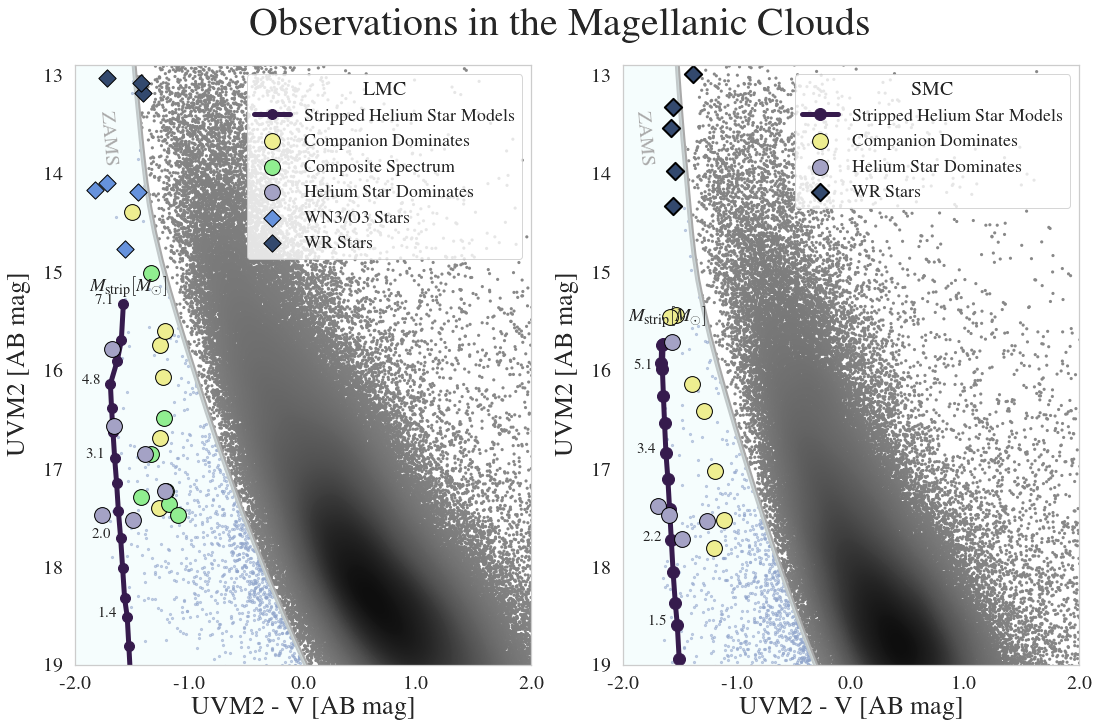

In [30]:
# Set plot:
f,axes = plt.subplots(1,2,figsize=(18,11.5))

sns.set(style="whitegrid",font='serif') 

#rc('font',**{'family':'serif','serif':['Times']})
#rc('text', usetex=True)

# All Data:
plot_all = True
if plot_all:
    
    #More filtering:
    index_s = np.where(np.array(x_cand) > -1.65)[0]
    index_l = np.where(np.array(lx_cand) > -1.7)[0]
    
    
    axes[1].scatter(x_ms, y_ms, c=z_ms, zorder = 0,s=10, edgecolor='',cmap=truncate_colormap(plt.get_cmap('Greys'), 0.55, 0.95),label="")
    axes[1].scatter(np.array(x_cand)[index_s],np.array(y_cand)[index_s],color=sky2,zorder = 0,s=5,label="",alpha=0.5)

    axes[0].scatter(lx_ms, ly_ms, c=lz_ms, zorder = 0,s=10, edgecolor='',cmap=truncate_colormap(plt.get_cmap('Greys'), 0.55, 0.95),label="")
    axes[0].scatter(np.array(lx_cand)[index_l],np.array(ly_cand)[index_l],color=sky2,zorder = 0,s=5,label="",alpha=0.5)

    
#### SMC SPECIFICS ######
# Shading
axes[1].fill_betweenx(zams_smc_uvm2AB,np.repeat(-3,len(zams_smc_uvm2AB )),zams_smc_uvm2AB - zams_smc_vAB,alpha=0.4,color="#e8fafc")

# ZAMS:
axes[1].plot(zams_smc_uvm2AB - zams_smc_vAB, zams_smc_uvm2AB,linewidth=5,color="darkgray",zorder=0,label="")

# Stripped Stars Model:
axes[1].plot(she_smc_uvm2AB - she_smc_vAB, she_smc_uvm2AB,linewidth=5,ms=12,marker="o",linestyle="-",label="Stripped Helium Star Models",zorder=1,color=purple1)
[axes[1].text(x+progenitor_sep,y,'%.1f' % float(string),fontweight="bold",fontsize=progenitorsize) for x,y,string in zip(progenitor_smc_x,progenitor_smc_y,progenitor_smc_label)]

#B-stars:
axes[1].scatter(sB_uvm2_v,sB_uvm2,marker="o",edgecolor="black",color=lightyellow,s=250,label="Companion Dominates",zorder=3)

# Isolated Targets:
axes[1].scatter(siso_uvm2_v,siso_uvm2,marker="o",edgecolor="black",color=purple2,s=250,label="Helium Star Dominates",zorder=3)

# WR Stars:
#axes[1].scatter(swn_uvm2_v,swn_uvm2,marker="D",color=darkblue,edgecolor="black",lw=2,s=150,zorder=1,label="WR Stars")

# WR Stars Synthetic Photometry: 
#axes[1].scatter(wr_new_uvm2-wr_new_v,wr_new_uvm2,marker="+",color=darkblue,edgecolor="black",lw=2,s=150,zorder=1,label="WR Stars")
axes[1].scatter(wr_new_uvm2-wr_new_v,wr_new_uvm2,marker="D",color=darkblue,edgecolor="black",lw=2,s=150,zorder=1,label="WR Stars")
#[axes[0].text(x,y,string,backgroundcolor = 'gray') for x,y,string in zip(wr_new_uvm2-wr_new_v,wr_new_uvm2,wr_new_path['name'])]



# Legend and Clean up:
axes[1].text(-1.9,13.5,"ZAMS",fontsize=textsize,zorder=1,weight='bold',rotation = -85,color="darkgray")

legend = axes[1].legend(prop={'size': legendsize,'weight':'bold'})
legend.set_title("SMC",prop={'size':textsize})

axes[1].xaxis.label.set_size(labelsize)
axes[1].set_xlabel("UVM2 - V [AB mag]")
axes[1].set_xlim(-2,2)
axes[1].set_ylim(19.,13)

axes[1].yaxis.label.set_size(labelsize)
axes[1].set_ylabel("UVM2 [AB mag]",labelpad=ypad)
axes[1].grid(False)                             
axes[1].set_xticks([-2.,-1.,0.,1.,2.])
axes[1].set_xticklabels([-2.,-1.,0.,1.,2.],fontsize=ticksize)
axes[1].set_yticks([19,18,17,16,15,14,13,12.9])
axes[1].set_yticklabels([19,18,17,16,15,14,13],fontsize=ticksize)






# Shading
axes[0].fill_betweenx(zams_lmc_uvm2AB,np.repeat(-3,len(zams_lmc_uvm2AB )),zams_lmc_uvm2AB - zams_lmc_vAB,alpha=0.4,color="#e8fafc")

# ZAMS:
axes[0].plot(zams_lmc_uvm2AB - zams_lmc_vAB, zams_lmc_uvm2AB,linewidth=5,color="darkgray",zorder=0,label="")

# Stripped Stars Model:
axes[0].plot(she_lmc_uvm2AB - she_lmc_vAB, she_lmc_uvm2AB,linewidth=5,ms=10,marker="o",linestyle="-",label="Stripped Helium Star Models",zorder=1,color=purple1)

[axes[0].text(x+progenitor_sep,y,'%.1f' % float(string),fontweight="bold",fontsize=progenitorsize) for x,y,string in zip(progenitor_lmc_x,progenitor_lmc_y,progenitor_lmc_label)]



#B-stars:
axes[0].scatter(B_uvm2_v,B_uvm2,marker="o",edgecolor="black",color=lightyellow,s=250,label="Companion Dominates",zorder=3)

#HeB-stars:
axes[0].scatter(HeB_uvm2_v,HeB_uvm2,marker="o",edgecolor="black",color=lightgreen,s=250,label="Composite Spectrum",zorder=3)

# HST Isolated Targets:
axes[0].scatter(iso_uvm2_v,iso_uvm2,marker="o",edgecolor="black",color=purple2,s=250,label="Helium Star Dominates",zorder=3)


# WN3/O3:
axes[0].scatter(wn_uvm2_v,wn_uvm2,marker="D",color=mediumblue,edgecolor="black",s=150,zorder=1,label="WN3/O3 Stars")

# WR LMC:
axes[0].scatter(wr_uvm2_v,wr_uvm2,marker="D",color=darkblue,edgecolor="black",s=150,zorder=1,label="WR Stars")


axes[1].text(progenitor_smc_x[-1]-.3,progenitor_smc_y[-1]-.4,r'$M_{\mathrm{strip}} [M_{\odot}]$',fontweight="bold",fontsize=progenitorsize+4)
axes[0].text(progenitor_lmc_x[-1]-.3,progenitor_lmc_y[-1]-.1,r'$M_{\mathrm{strip}} [M_{\odot}]$',fontweight="bold",fontsize=progenitorsize+4)

# Legend and Clean up:
axes[0].text(-1.8,13.5,"ZAMS",fontsize=textsize,zorder=1,weight='bold',rotation = -85,color="darkgray")


legend = axes[0].legend(prop={'size': legendsize,'weight':'bold'})
legend.set_title("LMC",prop={'size':textsize})

axes[0].xaxis.label.set_size(labelsize)
axes[0].set_xlabel("UVM2 - V [AB mag]")

axes[0].yaxis.label.set_size(labelsize)
axes[0].set_ylabel("UVM2 [AB mag]",labelpad=ypad)

axes[0].grid(False)
axes[0].set_xlim(-2.,2)
axes[0].set_ylim(19.,13)
axes[0].set_xticks([-2.,-1.,0.,1.,2.])
axes[0].set_xticklabels([-2.,-1.,0.,1.,2.],fontsize=ticksize)

axes[0].set_yticks([19,18,17,16,15,14,13,12.9])
#axes[0].set_yticks([19,18,17,16,15,14,13])
axes[0].set_yticklabels([19,18,17,16,15,14,13],fontsize=ticksize)


plt.suptitle("Observations in the Magellanic Clouds",size=titlesize,x=0.5,y=0.92,fontweight="bold")
plt.subplots_adjust(top=0.85)
#plt.tight_layout()
plt.savefig("photometry2.png",dpi=500)
plt.show()


In [22]:
print(sB_uvm2_v)
print(sB_uvm2)

0   -1.394395
1   -1.110552
2   -1.532750
3   -1.286114
4   -1.408697
5   -1.395601
6   -1.788289
dtype: float64
0    16.715605
1    17.522448
2    15.436250
3    16.412886
4    17.497303
5    16.141399
6    15.153711
dtype: float64


In [44]:
index_s = np.where(np.array(x_cand) > -1.5)[0]
index_s
print(len(x_cand),len(index_s))
test = np.array(x_cand)[index_s]

1177 1105
